In [7]:
include("../src/figures/xy_states.jl")

xy_states (generic function with 1 method)

In [8]:
runname_long = "Ri000-long"
datas = [xy_state_data(runname_long, n, 81:128; σ=3, field="b") for n in [2, 3, 4, 5, 6]];

In [9]:
n = length(datas)
l = size(datas[1].v, 2)
overlap_ratio = 0.2
total_length = Int((n * l - (n-1) * overlap_ratio * l)÷1)
w(j, i, n) = if j <= overlap_ratio * l && i > 1
    (j-1) / (overlap_ratio * l)
elseif j >= (1-overlap_ratio) * l && i < n
    (l-j) / (l-(1-overlap_ratio) * l)
elseif 1 < j < l
    1.0
else
    0
end

w (generic function with 1 method)

In [10]:
plot_data = zeros(size(datas[1].v, 1), total_length);

In [11]:
for j in 1:total_length
    for i in 1:n
        k = mod(j-1, l)+1
        plot_data[:, j] .+= datas[i].v[:, k] * w(j - (i-1)*l, i, n)
    end
    end;

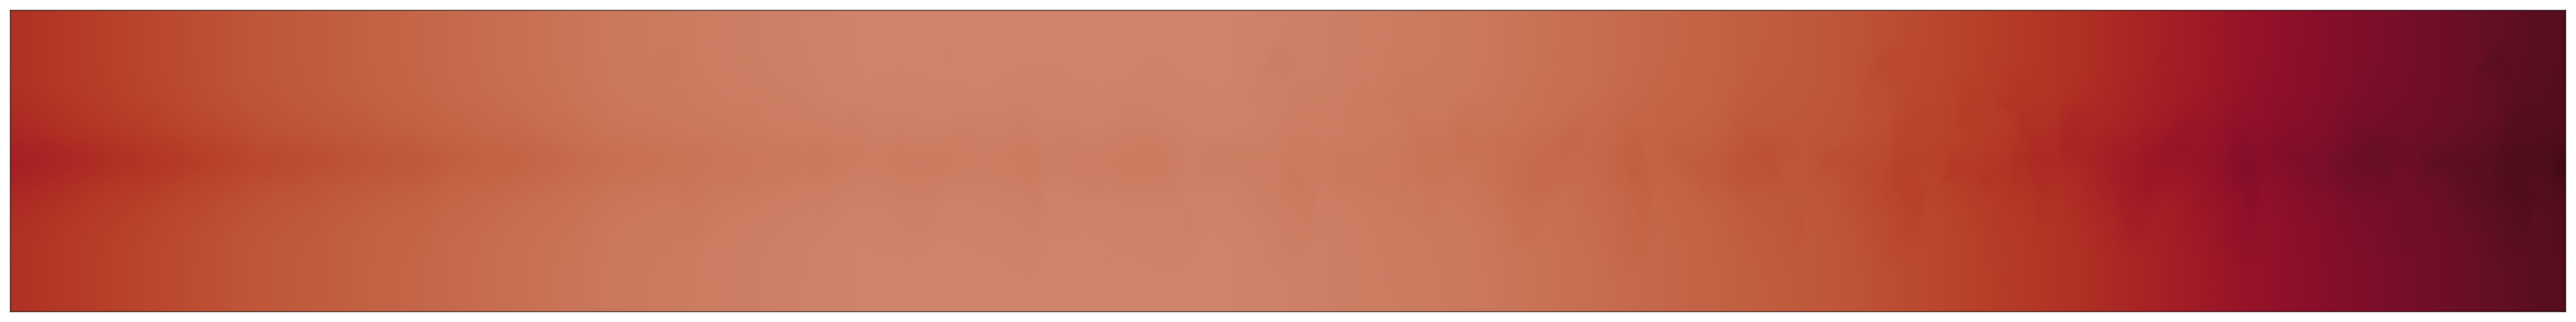

In [17]:
fig = Figure(resolution=(4000, 500))
ax = Axis(fig[1, 1])
cmax = maximum(abs.(plot_data))
contour!(ax, datas[1].ys[:], datas[1].xs, reverse(transpose(plot_data); dims=1), colormap=:balance, colorrange=(-cmax, cmax))
hidedecorations!(ax)
fig

In [19]:
datas[1].ys[1:e]

2048-element Vector{Float64}:
 -19.990234375
 -19.970703125
 -19.951171875
 -19.931640625
 -19.912109375
 -19.892578125
 -19.873046875
 -19.853515625
 -19.833984375
 -19.814453125
 -19.794921875
 -19.775390625
 -19.755859375
   ⋮
  19.775390625
  19.794921875
  19.814453125
  19.833984375
  19.853515625
  19.873046875
  19.892578125
  19.912109375
  19.931640625
  19.951171875
  19.970703125
  19.990234375